In [1]:
import scipy.io
import numpy as np

# Load the .mat file
mat_contents = scipy.io.loadmat(r"C:\Users\boba4\Box\Zach_repo\Projects\Remote_memory\Miniscope data\PL_TeA\good\CSminus removed\shock-tone-fxn-neuron_responses.mat")

# Extract the vectors
shock_response = mat_contents['shock_response'].flatten()
tone_response = mat_contents['tone_response'].flatten()

# Convert to boolean arrays if they're not already
shock_response = shock_response.astype(bool)
tone_response = tone_response.astype(bool)

# Print some basic information to verify the load
print(f"Shock response shape: {shock_response.shape}")
print(f"Tone response shape: {tone_response.shape}")
print(f"Number of shock-responsive neurons: {np.sum(shock_response)}")
print(f"Number of tone-responsive neurons: {np.sum(tone_response)}")

# Now you can use shock_response and tone_response in your analysis

Shock response shape: (112,)
Tone response shape: (112,)
Number of shock-responsive neurons: 30
Number of tone-responsive neurons: 21


In [29]:
#d1 data
do_d1 = False
if do_d1:
    shock_response = np.zeros([135])
    shock_response[0:29] = 1
    tone_response = np.zeros([135])
    tone_response[0:4]= 1
    tone_response[30:38] = 1
    shock_response = shock_response.astype(bool)
    tone_response = tone_response.astype(bool)

In [30]:
len(tone_response)

112

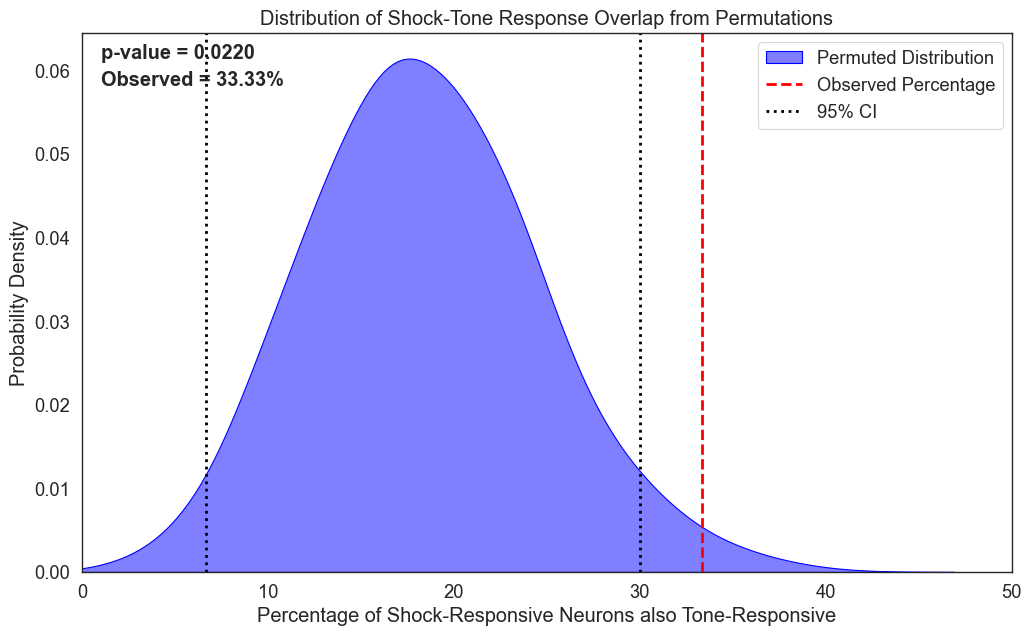

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
total_neurons = len(tone_response)
n_permutations = 1000
# Calculate observed percentage
observed_percentage = 100 * np.sum(shock_response & tone_response) / np.sum(shock_response)

# Perform permutation test
permuted_percentages = np.zeros(n_permutations)
for i in range(n_permutations):
    shuffled_tone = np.random.permutation(tone_response)
    permuted_percentages[i] = 100 * np.sum(shock_response & shuffled_tone) / np.sum(shock_response)

# Calculate p-value
p_value = np.sum(permuted_percentages >= observed_percentage) / n_permutations

# Calculate 95% confidence interval
ci_lower, ci_upper = np.percentile(permuted_percentages, [2.5, 97.5])

# Create DataFrame for seaborn
df = pd.DataFrame({'Percentage': permuted_percentages})

# Set up the plot
plt.figure(figsize=(12, 7))
sns.set_style("white")
sns.set_context("paper", font_scale=1.5)

# Plot smooth distribution with increased bandwidth
sns.kdeplot(data=df, x='Percentage', fill=True, color='blue', alpha=0.5, bw_adjust=1.5)

# Plot observed percentage
plt.axvline(observed_percentage, color='red', linestyle='--', linewidth=2)

# Plot 95% confidence interval
plt.axvline(ci_lower, color='black', linestyle=':', linewidth=2)
plt.axvline(ci_upper, color='black', linestyle=':', linewidth=2)

# Customize plot
plt.title('Distribution of Shock-Tone Response Overlap from Permutations')
plt.xlabel('Percentage of Shock-Responsive Neurons also Tone-Responsive')
plt.ylabel('Probability Density')

# Add text annotation for p-value, observed percentage, and CI
plt.text(0.02, 0.98, f'p-value = {p_value:.4f}', transform=plt.gca().transAxes, 
         ha='left', va='top', fontweight='bold')
plt.text(0.02, 0.93, f'Observed = {observed_percentage:.2f}%', 
         transform=plt.gca().transAxes, ha='left', va='top', fontweight='bold')

# Adjust axis for better visibility
plt.xlim(0, 50)

# Add legend
plt.legend(['Permuted Distribution', 'Observed Percentage', '95% CI'], loc='upper right')

# Save the figure as a high-resolution image
plt.savefig('d28 shock_tone_response_smooth_distribution_with_ci.svg', format='svg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()